In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import eigsh
from scipy.integrate import odeint
from scipy import integrate
from scipy import linalg
%matplotlib inline

In [67]:
def secant_method(f,x0,x1,tol):
    f0 = f(x0)
    f1 = f(x1)
    x2 = x1 - f1*(x1-x0)/(f1-f0)
    while np.abs(x2-x1)>=tol:
        x0 = x1
        x1 = x2
        f0 = f1
        f1 = f(x1)
        x2 = x1 - f1*(x1-x0)/(f1-f0)
    return x2

# DUE 12/11/19

**Problem 1**: (10pts) In quantum mechanics, it is really common to see boundary value problems of the form 

$$
-\epsilon\frac{d^{2}y}{dx^2} + |x|y = Ey, ~ y(-1) = 0, ~ y(1)=0.
$$

where $0\leq \epsilon \ll 1$, i.e. we let $\epsilon$ be a small positive parameter.  $E\geq 0$ is the _energy_ of a particle trapped in a potential well $V(x) = |x|$, which is formed by using two interferring electric fields.  We desribe the probability of a particle being in the interval $[-1,a]$, $a<1$ via the formula

$$
P(-1\leq x \leq a) = \int_{-1}^{a} \tilde{y}(x), ~ \tilde{y}(x) = \frac{y^{2}(x)}{\int_{-1}^{1}y^{2}(x)dx}
$$

1a) Using second-order centered-difference approximations and spdiags, write code which discretizes the operator $-\epsilon\frac{d^{2}y}{dx^2} + |x|y\approx A{\bf y}$, where ${\bf y}=\left(y_{1} ~y_{2}\cdots y_{N-1}\right)^{T}$, $y_{j}=y(x_{j})$.

1b) You have now formed a discrete eigenvalue problem $A{\bf y} = E{\bf y}$.  Using the code below find the first 10 eigenvalues of the discretized equations.  For $\epsilon=1,.1,.01$ and $.001$, describe via a well designed plot how the first ten energy levels change as you decrease $\epsilon$.  This is known in the literature as a _semi-classical limit_.

1c) For $\epsilon=.01$, compare the associated probability distributions $\tilde{y}(x)$ for the first three energy levels.  How do the likelihoods of where a particle would be found change with changing energy?   

(a) 
For the points $\left\{x_{j}\right\}_{j=1}^{N-1}$, we have the centered-difference approximations to the second derivative so that 

$$
y''(x_{j}) \approx \frac{1}{(\delta x)^{2}}\left(y_{j-1} - 2y_{j} + y_{j+1}\right), ~ j=1,\cdots,N-1.
$$

with the boundary conditions
$$
y(-1) = 0, ~ y(1) =0.
$$

$$
\frac{-\epsilon}{(\delta x)^{2}}\begin{pmatrix} -2 & 1 & &\\
1 & -2 & 1 &\\
 & & \ddots & & \\
 & & 1 & -2 & 1\\
 & & & 1 & -2
\end{pmatrix} \begin{pmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{N-2} \\ y_{N-1}\end{pmatrix} + \begin{pmatrix} \mid x_{1} \mid & 0 & &\\
0 & \mid x_{2}\mid & 0 &\\
 & & \ddots & & \\
 & & 0 & \mid x_{N-2} \mid & 0\\
 & & & 0 & \mid x_{N-1} \mid
\end{pmatrix}\begin{pmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{N-2} \\ y_{N-1}\end{pmatrix}
= A\cdot \begin{pmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{N-2} \\ y_{N-1}\end{pmatrix}
$$

In [6]:
def eval_find(Nvls,xvals,epvl):
    Nint = int(Nvls)
    dx = xvals[1]-xvals[0]
    idx2 = 1./(dx**2)
   
    diag = 2.*epvl*idx2*np.ones([Nint-1]) +np.abs(xvals[1:Nvls])
    odiag = -1*epvl*idx2*np.ones([Nint-1]) 
    data = np.array([diag,odiag,odiag])
    dvals = np.array([0,-1,1])
    Amat = spdiags(data, dvals, Nint-1, Nint-1)
    eigenvalues, eigenvectors = eigsh(Amat,10,which='SM',mode='buckling') # return energies and eigenvectors 
   
    return [eigenvalues, eigenvectors] # modify later to find appropriate eigenvectors 


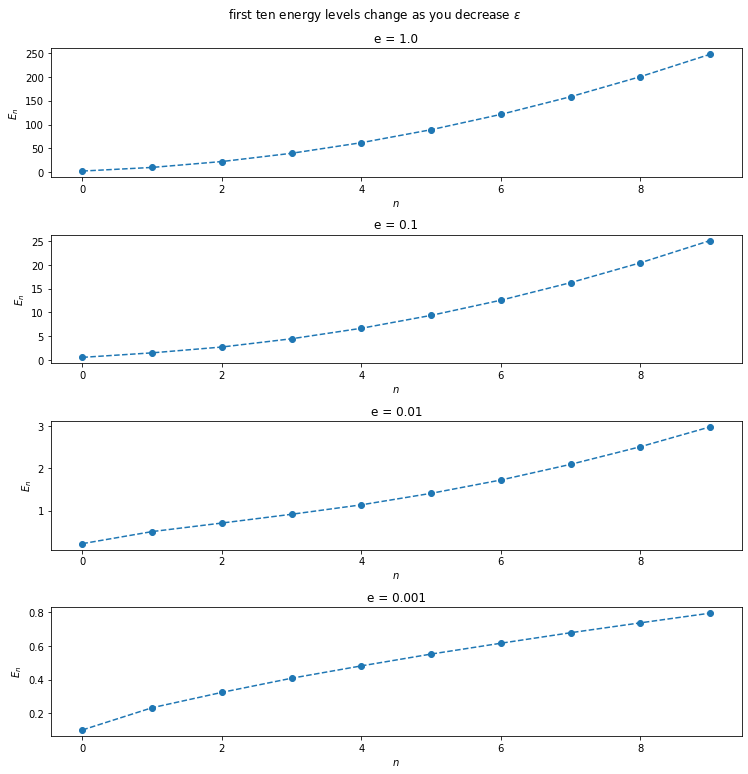

In [19]:
Nvls = 2000
xvals = np.linspace(-1.,1.,Nvls+1)
epvl = [1., 0.1, 0.01, 0.001]
fig, axs = plt.subplots(4)
idx = 0
for j in epvl:
    tprofile = eval_find(Nvls,xvals,j)
    axs[idx].plot(np.arange(tprofile.size),tprofile[:], marker='o', linestyle='dashed')
    axs[idx].set_title('e = %s' %j)
    axs[idx].set( xlabel = "$n$", ylabel = "$E_{n}$")
    idx+=1

fig.suptitle('first ten energy levels change as you decrease $\epsilon$',  y=1.02)
fig.set_size_inches(10.5, 10.5, forward=True)
plt.tight_layout()

(b) In the plot above, it is visible to see that as we decrease epsilon we get a smaller ten energy levels. The energy level is proportional to the epsilon value. As we can see, when we decrease epsilon by multiples of $(10)^{-1}$ we get energy levels that change by the same degree. 

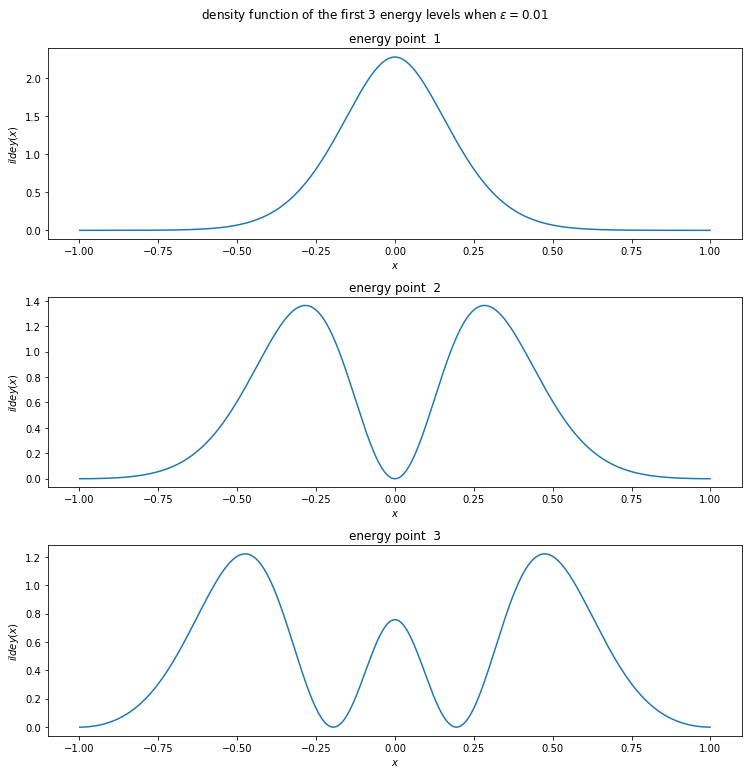

In [68]:
Nvls = 2000
xvals = np.linspace(-1.,1.,Nvls+1)
epvl = 0.01
info = eval_find(Nvls,xvals,epvl)
evals = info[0]
evecs = info[1]
fig, axs = plt.subplots(3)
idx = 0
for idx in range(0,3):
    bottom = np.trapz(evecs[:,idx]**2, xvals[1:Nvls])
    axs[idx].plot(xvals[1:Nvls],(evecs[:,idx]**2)/bottom)
    axs[idx].set_title('energy point  %s' % (idx+1))
    axs[idx].set( xlabel = '$x$', ylabel = '$ \tilde{y}(x) $')
    idx+=1

fig.suptitle('density function of the first 3 energy levels when $\epsilon = 0.01$',  y=1.02)
fig.set_size_inches(10.5, 10.5, forward=True)
plt.tight_layout()


(c) The likelihood of a particle be found changes with changing energy. This is because the tidle y (density function) changes with different energy values. As you can see the area under the graphs aboves will differ hence the propobility will change as well. This means that it it most probable to be in the middle close to x=0.

## Differential Equations in Time: A crash course

So, differential equations are equations involving a derivative.  They can be scalar problems like

$$
\frac{dy}{dt} = f(y,t), ~ y(t_{0}) = y_{0}
$$

or vector problems like

$$
\frac{d{\bf y}}{dt} = {\bf F}({\bf y},t), ~ {\bf y}(t_{0}) = {\bf y}_{0} \in \mathbb{R}^{n}.
$$

The condition $y(t_{0}) = y_{0}$ is called an _initial condition_.  

Some differential equations are easy to solve.  For example, if I ask you to solve 

$$
\frac{dy}{dt} = \lambda y, ~ y(t_{0}) = y_{0},
$$

we see almost by inspection that $y(t) = y_{0}e^{\lambda(t-t_{0})}$ solves the problem.  We can find this solution more systematically by seperating the equation.  In other words, we take 

$$
\frac{dy}{dt} = \lambda y,
$$

and turn it into 

$$
\frac{dy}{y} = \lambda dt.
$$

We then integrate both sides in the following way

$$
\int\frac{d y}{y} = \lambda\int dt.
$$

so that we find

$$
\ln\left|y(t)\right| = \lambda t + C,
$$

or 

$$
y(t) = \tilde{C}e^{\lambda t}, ~ \tilde{C} = e^{C}.
$$

Using the initial condition gives us $\tilde{C}=y_{0}e^{-\lambda t_{0}}$ and thus we have $y(t) = y_{0}e^{\lambda(t-t_{0})}$.

In general however, this trick does not work for very many differential equations of interest.  For example, the differential equation

$$
\frac{dy}{dt} = \cos(ty), ~ y(t_{0}) = y_{0},
$$

does not allow for separation between $y$ and $t$ since they are coupled inside the $\cos(ty)$ term.  

Thus, we turn to numerics.  Suppose I want a solution to the scalar initial-value problem 

$$
\frac{dy}{dt} = f(y,t), ~ y(t_{0}) = y_{0}
$$

for $t_{0}\leq t$.  I can then discretize the time so that I can try to interpolate my solution $y(t)$ at the discrete times $t_{j} = t_{0} + j\delta t$, $j=0,1,\cdots$.  Thus, if we work between the times $t_{n}$ and $t_{n+1} = t_{n} + \delta t$, we see that 

$$
\int_{t_{n}}^{t_{n+1}}\frac{dy}{dt}dt = \int_{t_{n}}^{t_{n+1}}f(y(t),t) dt,
$$

and so by integrating the left side and rearranging, we have that 

$$
y_{n+1} = y_{n} + \int_{t_{n}}^{t_{n+1}}f(y(t),t) dt,
$$

where $y_{n} = y(t_{n})$ and $y_{n+1} = y(t_{n+1})$.  Thus, by using different interpolatory approximations to the integral, we find different discretizations of the differential equation.  For example

* $f(y(t),t)\approx f(y_{n},t_{n})$ so $\int_{t_{n}}^{t_{n+1}}f(y(t),t) dt \approx \delta t f(y_{n},t_{n})$.

* $f(y(t),t)\approx f(y_{n+1},t_{n+1})$ so $\int_{t_{n}}^{t_{n+1}}f(y(t),t) dt \approx \delta t f(y_{n+1},t_{n+1})$.

* $f(y(t),t)\approx \frac{f(y_{n+1},t_{n+1})-f(y_{n},t_{n})}{\delta t}(t-t_{n}) + f(y_{n},t_{n})$, so $\int_{t_{n}}^{t_{n+1}}f(y(t),t) dt \approx \frac{\delta t}{2} \left( f(y_{n+1},t_{n+1}) + f(y_{n},t_{n})\right)$.

We then get the following methods for numerically solving the differential equation

* Foward Euler's Method: $y_{n+1} = y_{n} + \delta t f(y_{n},t_{n})$.
* Backward Euler's Method: $y_{n+1} = y_{n} + \delta t f(y_{n+1},t_{n+1})$.
* Trapezoid Method: $y_{n+1} = y_{n} + \frac{\delta t}{2}\left(f(y_{n},t_{n}) + f(y_{n+1},t_{n+1})\right)$.

The first method is called _explicit_ since we can find $y_{n+1}$ in terms of $y_{n}$ directly, whereas the next two methods are called _implicit_ since we have to solve for $y_{n+1}$ at each time step in order to move the method forward.  Thus, the implicit methods need a root finder in order to work in general.  See the code below for implementations of both Forward and Backward Euler in order to solve 

$$
\frac{dy}{dt} = \cos(ty), ~ y(0) = 10,
$$

for $0\leq t \leq 10$.

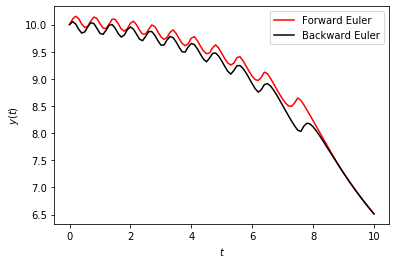

In [7]:
def forward_euler(f,dt,t0,tf,y0):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        ysol[jj] = ysol[jj-1] + dt*f(times[jj-1],ysol[jj-1])
        times[jj] = times[jj-1] + dt
    return np.array([times,ysol])

def backward_euler(f,dt,t0,tf,y0):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        times[jj] = times[jj-1] + dt
        floc = lambda y: (y-ysol[jj-1])-dt*f(times[jj],y)
        ysol[jj] = secant_method(floc,ysol[jj-1]/2.,ysol[jj-1],1e-6) # Note, we need a root finder for the implicit scheme.
    return np.array([times,ysol])

                         
                     
myf = lambda t,y: np.cos(t*y)
t0 = 0.
tf = 10.
y0 = 10.

dt = .1
feuler_sol = forward_euler(myf,dt,t0,tf,y0)
beuler_sol = backward_euler(myf,dt,t0,tf,y0)

plt.plot(feuler_sol[0][:],feuler_sol[1][:],color='r',label="Forward Euler")
plt.plot(beuler_sol[0][:],beuler_sol[1][:],color='k',label="Backward Euler")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.legend(loc='best')

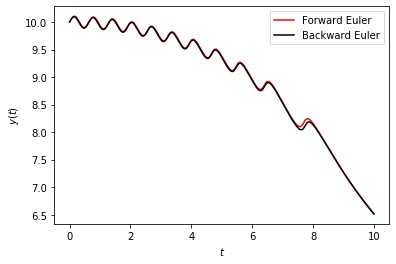

In [8]:
dt = .01
feuler_sol = forward_euler(myf,dt,t0,tf,y0)
beuler_sol = backward_euler(myf,dt,t0,tf,y0)

plt.plot(feuler_sol[0][:],feuler_sol[1][:],color='r',label="Forward Euler")
plt.plot(beuler_sol[0][:],beuler_sol[1][:],color='k',label="Backward Euler")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.legend(loc='best')

Looking at our examples then, we see that we get markedly different results when we choose $\delta t = .01$ vs $\delta t = .1$.  Overall, we see that the change in the Forward Euler method is far more dramatic as we decrease the step size than for the Backward Euler method.  Thus, while the Backward Euler method is more computationally intensive since we need to use a root finder to update the method at each time step, we also can get away with using a much larger time step.   

**Problem 2**: (10 pts)

2a) Implement the Trapezoid method and then compare the results from the Forward Euler, Backward Euler, and Trapezoid Method for the test problem
$$
\frac{dy}{dt} = \lambda y, ~ y(0) = 1, ~ 0\leq t \leq 1.
$$
Develop test cases for $\lambda < 0$ and $\lambda >0$.  Using the exact solution described above, determine the order of error of each method.  Describe the behavior of the solutions and their accuracy as you vary $\delta t$ in the different methods.  Note, for this problem, we see that we do not need a root finder for the implicit schemes since 

Backward Euler: $y_{n+1} = y_{n}+\delta t \lambda y_{n+1}$ so $y_{n+1} = \frac{y_{n}}{1-\lambda \delta t} = \left(\frac{1}{1-\lambda \delta t} \right)^{n+1}y_{0}$

Trapezoid: $y_{n+1} = y_{n}+\frac{\lambda\delta t}{2} \left(y_{n+1}+y_{n}\right)$ so $y_{n+1} = \frac{1+\lambda \delta t/2}{1-\lambda \delta t/2}y_{n} = \left(\frac{1+\lambda \delta t/2}{1-\lambda \delta t/2} \right)^{n+1}y_{0}$.

2b) For the differential equation 
$$
\frac{dy}{dt} = \cos(y), ~ y(0) = 10, ~ 0\leq t \leq 10,
$$
find an exact solution using the fact that the problem is seperable. Then solve it using the Trapezoid Method.  Again, determine the order of error of the method and comment on how the numerical solution changes with step size $\delta t$. 

2c) For the differential equation
$$
\frac{dy}{dt} = \cos(ty), ~ y(0) = 10, ~ 0\leq t \leq 10,
$$
solve it using the Trapezoid method.  How does your solution compare in behavior to that you found in $2b$?  Explore several choices of step size $\delta t$ and determine the relative strengths and weaknesses of all three different approaches. In particular, which method allows for the largest time step $\delta t$ such that you get believable results?



$$
\frac{dy}{dt} = \lambda y, ~ y(0) = 1, ~ 0\leq t \leq 1.
$$ 
is seperable such that:
$$
\int \frac{1}{y} {dy} = \int \lambda {dt} \\
ln|y| = t\lambda + C\\
y = e^{t\lambda + C}\\
y(0) = 1 = e^{C}\\
C = 0\\
y = e^{t\lambda}
$$

In [9]:
def trapezoid_method(dt,t0,tf,y0, lam):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        ysol[jj] = (((1+lam*(dt/2))/(1-lam*(dt/2)))**(jj+1))*y0 #You're off by one power here.  CWC
        times[jj] = times[jj-1] + dt
    return np.array([times,ysol])

def backwardeuler(dt,t0,tf,y0, lam):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        ysol[jj] = ((1/(1-lam*dt))**(jj+1))*y0
        times[jj] = times[jj-1] + dt
    return np.array([times,ysol])

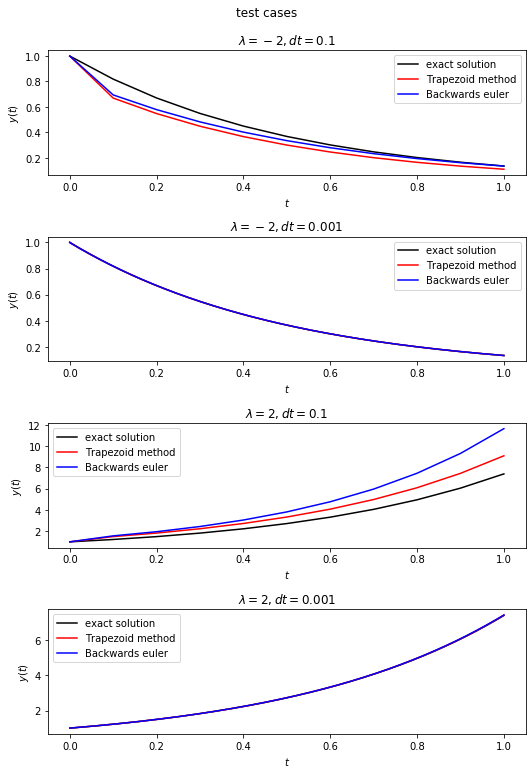

In [90]:
t0 = 0.
tf = 1.
y0 = 1.
dt = [0.1,0.001, 0.1, 0.001]
lam = [-2,-2,2, 2]
f = lambda t,lam: np.exp(t*lam)
fig, axs = plt.subplots(4)
idx = 0
for val in dt:
    tres = trapezoid_method(val,t0,tf,y0,lam[idx])
    bres = backwardeuler(val,t0,tf,y0, lam[idx])
    axs[idx].plot(tres[0][:],f(tres[0][:], lam[idx]),color='k',label="exact solution")
    axs[idx].plot(tres[0][:],tres[1][:],color='r',label="Trapezoid method")
    axs[idx].plot(bres[0][:],bres[1][:],color='b',label="Backwards euler")
    axs[idx].set_title('$\lambda = %s, dt = %s$' %(lam[idx],val))
    axs[idx].set( xlabel = "$t$", ylabel = "$y(t)$")
    axs[idx].legend(loc='best')
    idx+=1

fig.suptitle('test cases',  y=1.02)
fig.set_size_inches(7.5, 10.5, forward=True)
plt.tight_layout()

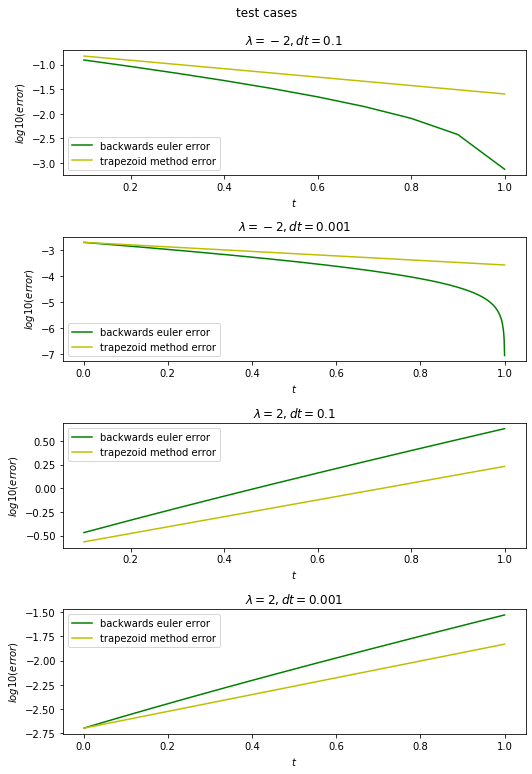

In [73]:
t0 = 0.
tf = 1.
y0 = 1.
dt = [0.1, 0.001, 0.1, 0.001]
lam = [-2,-2,2,2]
f = lambda t,lam: np.exp(t*lam)

fig, axs = plt.subplots(4)

idx = 0

for val in dt:
    tres = trapezoid_method(val,t0,tf,y0,lam[idx])
    bres = backwardeuler(val,t0,tf,y0, lam[idx])
    axs[idx].plot(tres[0][:],np.ma.log10(np.abs(f(bres[0][:], lam[idx])-bres[1][:])),color='g',label="backwards euler error")
    axs[idx].plot(tres[0][:],np.ma.log10(np.abs(f(tres[0][:], lam[idx])-tres[1][:])),color='y',label="trapezoid method error")
    axs[idx].set_title('$\lambda = %s, dt = %s$' %(lam[idx],val))
    axs[idx].set( xlabel = "$t$", ylabel = "$log10(error)$")
    axs[idx].legend(loc='best')
    idx+=1

fig.suptitle('test cases',  y=1.02)
fig.set_size_inches(7.5, 10.5, forward=True)
plt.tight_layout()

As we increase lambda we need to decrease dt. Hence, the smaller lambda and dt are the closer approximation is the backwards euler method to the trapezoid method.
In addition, we see that using euler backwards method would be a better approximation for the exact solution when lambda is negative. Whereas, using the trapezoid method would be best when lambda is positive.
In both cases, as dt gets smaller both methods work better to approximate the exact solution.

(b) We have:
$$
\frac{dy}{dt} = \cos(y), ~ y(0) = 10, ~ 0\leq t \leq 10,
$$
then, 
$$
\int \frac{1}{cos(y)} {dy}= \int {dt}\\
ln|sec(y) +tan(y)| = t+C\\
sec(y) + tan(y) = e^{t+C}\\
sec(10)+tan(10) = e^{C}\\
sec(y) + tan(y) = [sec(10)+tan(10)]e^{t}\\
$$

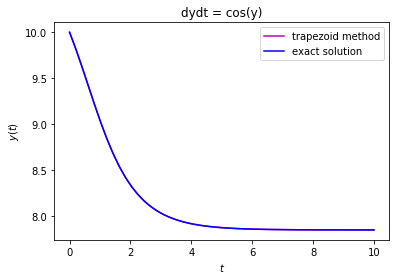

In [41]:
def trap_meth(f, dt, t0, tf, y0):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        times[jj] = times[jj-1] + dt
        floc = lambda y: (y-ysol[jj-1])-(dt/2)*f(y, times[jj])- (dt/2)*f(ysol[jj-1], times[jj-1])
        ysol[jj] = secant_method(floc,ysol[jj-1]/2.,ysol[jj-1],1e-6)
    return np.array([times,ysol])                       
                     
t0 = 0.
tf = 10.
y0 = 10.
dt = .1

dydt = lambda y,t: np.cos(y)
t = np.linspace(0,10)
yexact = odeint(dydt,y0,t)

trap_sol = trap_meth(dydt, dt, t0, tf, y0)

plt.plot(trap_sol[0][:],trap_sol[1][:],color='m',label="trapezoid method")
plt.plot(t, yexact, color='b',label="exact solution")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.title("dydt = cos(y)")
plt.legend(loc='best')

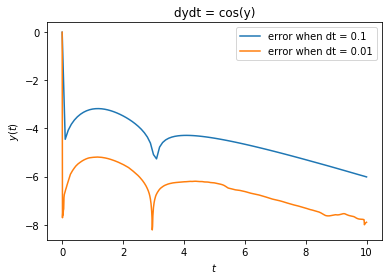

In [42]:
t0 = 0.
tf = 10.
y0 = 10.
dt = [.1, 0.01]

dydt = lambda y,t: np.cos(y)
for idx in range(0,len(dt)):
    t = np.linspace(0,10, int((np.round((tf-t0)/dt[idx])))+1)
    yexact = odeint(dydt,y0,t)
    trap_sol = trap_meth(dydt, dt[idx], t0, tf, y0)
    diff = np.ma.log10(np.abs(trap_sol[1][:]-yexact))
    avediff = np.array([])
    for jj in range(0,int((np.round((tf-t0)/dt[idx])))+1):
        avediff = np.append(avediff, min(diff[jj]))
    plt.plot(t, avediff,label="error when dt = %s" %dt[idx])
    plt.xlabel("$t$")
    plt.ylabel("$y(t)$")
    plt.title("dydt = cos(y)")
    plt.legend(loc='best')


The error of the trapezoid method decreases as we decrease the step size dt. When dt is 0.1 the result is best case accurate up to 4 digits and when dt is 0.01 the result is best case accurate up to 8 digits. 

2c) For the differential equation
$$
\frac{dy}{dt} = \cos(ty), ~ y(0) = 10, ~ 0\leq t \leq 10,
$$



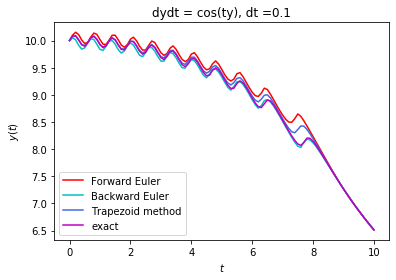

In [43]:
#(c)
def forward_euler(f,dt,t0,tf,y0):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        ysol[jj] = ysol[jj-1] + dt*f(times[jj-1],ysol[jj-1])
        times[jj] = times[jj-1] + dt
    return np.array([times,ysol])

def backward_euler(f,dt,t0,tf,y0):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        times[jj] = times[jj-1] + dt
        floc = lambda y: (y-ysol[jj-1])-dt*f(times[jj],y)
        ysol[jj] = secant_method(floc,ysol[jj-1]/2.,ysol[jj-1],1e-6) # Note, we need a root finder for the implicit scheme.
    return np.array([times,ysol])
def trap_meth(f, dt, t0, tf, y0):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        times[jj] = times[jj-1] + dt
        floc = lambda y: (y-ysol[jj-1])-(dt/2)*f(y, times[jj])- (dt/2)*f(ysol[jj-1], times[jj-1])
        ysol[jj] = secant_method(floc,ysol[jj-1]/2.,ysol[jj-1],1e-6)
    return np.array([times,ysol])  
                         
                     
myf = lambda t,y: np.cos(t*y)
t0 = 0.
tf = 10.
y0 = 10.
dt = 0.1
t = np.linspace(0,10, int((np.round((tf-t0)/dt)))+1)
yexact = odeint(myf,y0,t)

feuler_sol = forward_euler(myf,dt,t0,tf,y0)
beuler_sol = backward_euler(myf,dt,t0,tf,y0)
trapezoid_sol = trap_meth(myf, dt, t0, tf, y0)
plt.plot(feuler_sol[0][:],feuler_sol[1][:],color='r',label="Forward Euler")
plt.plot(beuler_sol[0][:],beuler_sol[1][:],color='c',label="Backward Euler")
plt.plot(trapezoid_sol[0][:],trapezoid_sol[1][:],color='royalblue',label="Trapezoid method")
plt.plot(t,yexact,color='m',label="exact")
plt.title("dydt = cos(ty), dt =0.1")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.legend(loc='best')









This graph looks different in comparison to the results seen in problem 2(b) this is becuase for b the derivative is equal to cos(y) hence it is independ to t-values, whereas for c the derivative of y is equal to cos(ty) which is dependent on y and t.

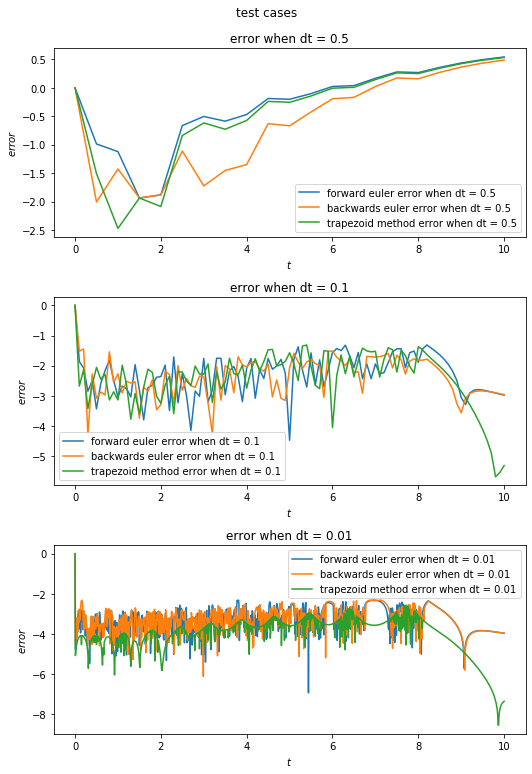

In [93]:
myf = lambda t,y: np.cos(t*y)
t0 = 0.
tf = 10.
y0 = 10.
dt = [0.5, 0.1,0.01]

fig, axs = plt.subplots(3)
idx = 0
for jj in dt:
    t = np.linspace(0,10, int((np.round((tf-t0)/jj)))+1)
    yexact = odeint(myf,y0,t)
    feuler_sol = forward_euler(myf,jj,t0,tf,y0)
    beuler_sol = backward_euler(myf,jj,t0,tf,y0)
    trapezoid_sol = trap_meth(myf, jj, t0, tf, y0)
    diffe1 = np.ma.log10(np.abs(feuler_sol[1][:]-yexact))
    diffe2 = np.ma.log10(np.abs(beuler_sol[1][:]-yexact))
    diffe3 = np.ma.log10(np.abs(trapezoid_sol[1][:]-yexact))
    diffe = np.array([])
    diffb = np.array([])
    difft = np.array([])
    for jj in range(0,int((np.round((tf-t0)/jj)))+1):
        diffe = np.append(diffe, min(diffe1[jj]))
        diffb = np.append(diffb, min(diffe2[jj]))
        difft = np.append(difft, min(diffe3[jj]))
    axs[idx].plot(t, diffe,label="forward euler error when dt = %s" %dt[idx])
    axs[idx].plot(t, diffb,label="backwards euler error when dt = %s" %dt[idx])
    axs[idx].plot(t, difft,label="trapezoid method error when dt = %s" %dt[idx])
    axs[idx].set(xlabel = "$t$", ylabel = "$error$")
    axs[idx].set_title("error when dt = %s" %dt[idx])
    axs[idx].legend()
    idx+=1

fig.suptitle('test cases',  y=1.02)
fig.set_size_inches(7.5, 10.5, forward=True)
plt.tight_layout()

The best method to use when you have a very small step size (equal or less than 0.01) is the trapezoid method, then the bakcwards euler method and lastly forward euler method. Whereas, for a big step size such as (0.5) they all perform the same accuracy. Overall, we can say that all three methods are equally efficient. 

**Problem 3**: (10 pts) A more realistic way to describe the dynamics of temperature in a narrow corridor is via the _heat equation_, which is a partial differential equation describing how the temperature $T(x,t)$ changes in both space and time.  It is given by

$$
\frac{\partial T}{\partial t} = k \frac{\partial^{2}T}{\partial x^{2}}, ~ a\leq x \leq b
$$

where $k>0$ is the _thermal diffusion_ coefficient, and where we have the _insulating_ boundary conditions 

$$
\left.\frac{\partial T(x,t)}{\partial x}\right|_{x=a} = \left.\frac{\partial T(x,t)}{\partial x}\right|_{x=b} = 0, 
$$

and the initial temperature distribution

$$
T(x,0) = u(x).
$$

By insulating, we mean that no heat escapes through the lateral walls at $x=a$ and $x=b$.  To numerically solve this, letting $x_{j}= a + j\delta x$, $\delta x = (b-a)/N$

3a) Letting $T_{j}(t)=T(x_{j},t)$, show that the insulating boundary conditions are approximated by the centered-finite-difference approximations:
$$
T_{0}(t) = T_{2}(t), ~ T_{N}(t) = T_{N-2}(t).  
$$

3b) Using second-order centered-differencing approximations for the $\partial^{2}T/\partial{x^{2}}$ term, show that by discretizing in space, you get the following initial value problem

$$
\frac{d{\bf T}}{dt} = kA{\bf T}, ~ {\bf T}(t) = \begin{pmatrix} T_{1}(t) \\ T_{2}(t) \\ \cdots \\ T_{N-1}(t)\end{pmatrix}, ~ {\bf T}(0) = \begin{pmatrix} u(x_{1}) \\ u(x_{2}) \\ \cdots \\ u(x_{N-1})\end{pmatrix}
$$

where $A$ is some $(N-1)\times (N-1)$ sparse matrix.  What is $A$?  Is $A$ still symmetric?   

3c) Using the Trapezoid Method, we can discretize in time so that if we use time step $\delta t$, we get 

$$
\left(I - \frac{\delta t k}{2} A\right){\bf T}_{m+1} = \left(I + \frac{\delta t k}{2} A\right){\bf T}_{m},
$$

where 

$$
{\bf T}_{m} = {\bf T}(t_{m}) = \begin{pmatrix} T(x_{1},t_{m}) \\ T(x_{2},t_{m}) \\ \cdots \\ T(x_{N-1},t_{m})\end{pmatrix}
$$

Using the code snippet below implement the above scheme to solve the heat equation.  Using the initial heat distribution

$$
u(x) = e^{-(x-5)^{2}}, ~ 0\leq x \leq 10,
$$

generate several plots which show for $0\leq t \leq 10$ how changing the thermal diffusion paramter $k$ from $k=1,10,100$ changes the behavior of the temperature.  Explain your results and comment on any interesting phenomena. 

(a) we have:
$$
\frac{\partial T}{\partial t} = k \frac{\partial^{2}T}{\partial x^{2}}, ~ a\leq x \leq b
$$

$$
\left.\frac{\partial T(x,t)}{\partial x}\right|_{x=a} = \left.\frac{\partial T(x,t)}{\partial x}\right|_{x=b} = 0, 
$$

$x_{j}= a + j\delta x$, $\delta x = (b-a)/N$

Let $T_{j}(t)=T(x_{j},t)$, 

forward difference approximation $\frac{\partial T(x_{0})}{\partial x} \approx \frac{1}{2\delta x}(-T(x_{0}) + T(x_{2})) =0$ hence, $T_{0}(t) = T_{2}(t)$

and backwards difference approximation: $\frac{\partial T(x_{N})}{\partial x} \approx \frac{1}{2\delta x}(-T(x_{N-2}) + T(x_{N})) =0$ hence, $T_{N}(t) = T_{N-2}(t)$.



(b)
$$
T''(x_{j}) \approx \frac{1}{(\delta x)^{2}}\left(T_{j-1} - 2T_{j} + T_{j+1}\right), ~ j=1,\cdots,N-1.
$$



$$
\frac{1}{(\delta x)^{2}}\begin{pmatrix} -2 & 1 & &\\
1 & -2 & 1 &\\
 & & \ddots & & \\
 & & 1 & -2 & 1\\
 & & & 1 & -2
\end{pmatrix} \begin{pmatrix} T_{1}(t) \\ T_{2}(t) \\ \vdots \\ T_{N-2}(t) \\ T_{N-1}(t)\end{pmatrix} = \begin{pmatrix} T''(x_{1},t) \\ T''(x_{2},t) \\ \vdots \\T''(x_{N-1}, t) \\ T''(x_{N-2}, t) \end{pmatrix}
$$


$$
\frac{\partial T}{\partial t} = k \cdot \frac{1}{(\delta x)^{2}}\begin{pmatrix} -2 & 1 & &\\
1 & -2 & 1 &\\
 & & \ddots & & \\
 & & 1 & -2 & 1\\
 & & & 1 & -2
\end{pmatrix} \begin{pmatrix} T_{1}(t) \\ T_{2}(t) \\ \vdots \\ T_{N-2}(t) \\ T_{N-1}(t)\end{pmatrix}
$$

Then, we can say $A$ is a $(N-1)\times (N-1)$ sparse and symmertic matrix such that:
$$
\frac{d{\bf T}}{dt} = kA{\bf T}, ~ {\bf T}(t) = \begin{pmatrix} T_{1}(t) \\ T_{2}(t) \\ \cdots \\ T_{N-1}(t)\end{pmatrix}, ~ {\bf T}(0) = \begin{pmatrix} u(x_{1}) \\ u(x_{2}) \\ \cdots \\ u(x_{N-1})\end{pmatrix}
$$



3c) we get 

$$
\left(I - \frac{\delta t k}{2} A\right){\bf T}_{m+1} = \left(I + \frac{\delta t k}{2} A\right){\bf T}_{m},
$$

where 

$$
{\bf T}_{m} = {\bf T}(t_{m}) = \begin{pmatrix} T(x_{1},t_{m}) \\ T(x_{2},t_{m}) \\ \cdots \\ T(x_{N-1},t_{m})\end{pmatrix}
$$
$$
u(x) = e^{-(x-5)^{2}}, ~ 0\leq x \leq 10,
$$


In [37]:
def heat_eq_solver(k,u0,Nvls,dx,dt,t0,tf):
    nsteps = int(np.round((tf-t0)/dt))
    Tsol = np.zeros((Nvls,nsteps+1)) # build a matrix to store our solution 
    Tsol[:,0] = u0
    r = numpy.ones(Nvls+2)*k*dt/(2.0 * dx**2)
    rhs = spdiags([-r, 1.0 + 2.0 * r, -r], [-1, 0, 1], Nvls-1, Nvls-1)
    lhs = spdiags([r, 1.0 - 2.0 * r, r], [-1, 0, 1],  Nvls-1, Nvls-1)
    
    # You've got some work to do here.  
    for mm in range(0,nsteps+1):
            # blah blah blah
        Tsol[:,mm+1] = spsolve(lhs, rhs.dot(Tsol[:,mm]))
    return Tsol

In [44]:
def solve_heat(Nvls, k, t0, tf, u0, dx):
    #output: solution at tf hence T(:tf)
    N = 101
    t = numpy.linspace(t0, tf, N)
    dt = t[1]-t[0]

    Tsol= numpy.zeros(Nvls+2)
    Tsol_temp = numpy.zeros(Nvls+2)
    
    r = numpy.ones(Nvls+2)*k*dt/(2.0 * dx**2)
    A = spdiags([-r, 1.0 + 2.0 * r, -r], [-1, 0, 1], Nvls+2, Nvls+2).tocsr()
    B = spdiags([r, 1.0 - 2.0 * r, r], [-1, 0, 1],  Nvls+2, Nvls+2).tocsr()
    for i in range(0, Nvls+2):
        Tsol_temp[i] = u0[i]
    for n in range(N):
        b = B.dot(Tsol_temp[:])
    # Solve system
        Tsol[:] = spsolve(A, b)
        Tsol_temp[:] = Tsol  
    
    return Tsol

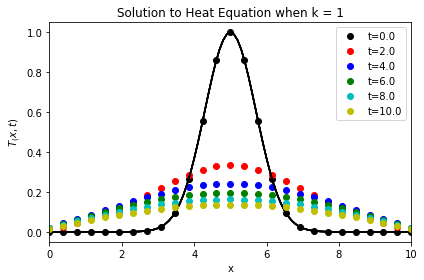

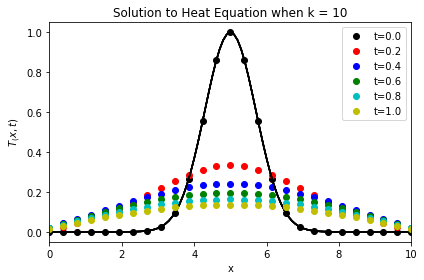

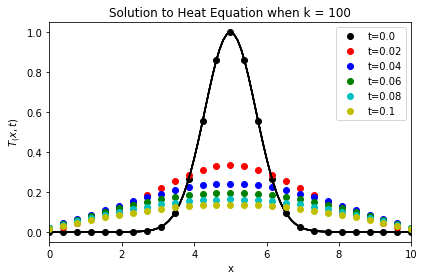

In [47]:
k = [1,10,100]
L = 10.0
u_true = lambda x, t: numpy.exp(-(x-5)**2.)

# Discretization and output times
Nvls = 25
x = numpy.linspace(0.0, 10, Nvls + 2)
x_fine = numpy.linspace(0.0, 10, 101)
dx = 10/ float(Nvls + 1)
output_times = [np.linspace(0,10,6), np.linspace(0,1,6), np.linspace(0,0.1,6)]

# Solve
for idx in range(0,len(k)):
    Tsol = numpy.empty((len(output_times[idx]), Nvls + 2))
    Tsol[0, :] = u_true(x, 0.0)
    for (n, t) in enumerate(output_times[idx][1:]):
        Tsol[n + 1, :] = solve_heat(Nvls, k[idx], output_times[idx][n], t, Tsol[n, :],dx)

    # Plot some of the results
    colors = ['k', 'r', 'b', 'g', 'c', 'y']
    for (n, t) in enumerate(output_times[idx]):
        plt.plot(x_fine, u_true(x_fine, t), 'k-')
        plt.plot(x, Tsol[n, :], "o%s" % colors[n], label='t=%s' % numpy.round(t, 4))
        plt.xlabel("x")
        plt.ylabel("$T_(x,t)$")
        plt.title("Solution to Heat Equation when k = %s"% k[idx])
        plt.xlim([0, L])
        plt.legend()

    plt.tight_layout()
    plt.show()

As we see above, signal travels significanlty fast. As we increase k from 1 to 10 and from 10 to 100, we need to change the size of time samples. Hence, if you look above, all graphs look the same but this is becuase the time sampled is different. The value of k signifcantly changes the tempature in a certain time and space. 
The black graph represents T(x,0), meaning the tempature at time equal to zero.Then, the colorful graphs show the temp after that. 

**Comments**: Incorrect implementation of boundary conditions.  -2

**Total**: 28/30